In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
#import dataset
data_set = pd.read_csv('Prostate_Cancer.csv')

In [3]:
#show dataseat top 10 column
data_set.head(10)

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059
5,6,B,25,25,83,477,0.128,0.170,0.209,0.076
6,7,M,16,26,120,1040,0.095,0.109,0.179,0.057
7,8,M,15,18,90,578,0.119,0.165,0.220,0.075
8,9,M,19,24,88,520,0.127,0.193,0.235,0.074
9,10,M,25,11,84,476,0.119,0.240,0.203,0.082


In [4]:
# drop unecessery column and show dataset
data_drop = data_set.drop(columns=['id'])

In [5]:
data_drop.head(4)

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,M,23,12,151,954,0.143,0.278,0.242,0.079
1,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,M,14,16,78,386,0.070,0.284,0.260,0.097


In [6]:
#seperated the independent and dependent variable
x= data_drop.iloc[:,1:]
y= data_drop.iloc[:,0]

In [7]:
#split the x and y in train and test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=43)

In [14]:
#scall the train and test data
scall = StandardScaler()
scall.fit(x_train)#calculate the mean and deviation for the scaling
x_train_scal = scall.transform(x_train)
x_test_scal = scall.transform(x_test)

In [15]:
#conver the scall data to the datafrane
x_train_scal_df = pd.DataFrame(x_train_scal,columns=x_train.columns)
x_test_scal_df = pd.DataFrame(x_test_scal,columns=x_test.columns)

In [16]:
#create column transform for the categorical and numerical data
num_column_transform = x_train.select_dtypes(include=['int64','float64']).columns
cat_column_transform = x_train.select_dtypes(include=['object']).columns

In [21]:
#create a pipeline for the neumerica and categorical transform
mum_column_transform_pipeline = Pipeline(steps=[
    ('num',SimpleImputer(strategy='mean')),
    ('scal',StandardScaler())
])

cat_column_transform_pipeline = Pipeline(steps=[
    ('cat',SimpleImputer(strategy='most_frequent')),
    ('one_hot',OneHotEncoder())
])

In [23]:
#cre transform for the column transfrom in prprocessig
preprocessing = ColumnTransformer(transformers=[
    ('num_tranf',mum_column_transform_pipeline,num_column_transform),
    ('cat_tranf',cat_column_transform_pipeline,cat_column_transform)
])

In [24]:
#create a pipeline for the model and preprocessing
KMeans_model = Pipeline(steps=[
    ('preprocessing',preprocessing),
    ('KMeans',KMeans())
])

In [29]:
#find the number of the cluste
wcss =[]
for i in range(1,11):
    Km = KMeans(n_clusters=i)
    Km.fit_predict(x_train_scal_df)
    wcss.append(Km.inertia_)

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:14

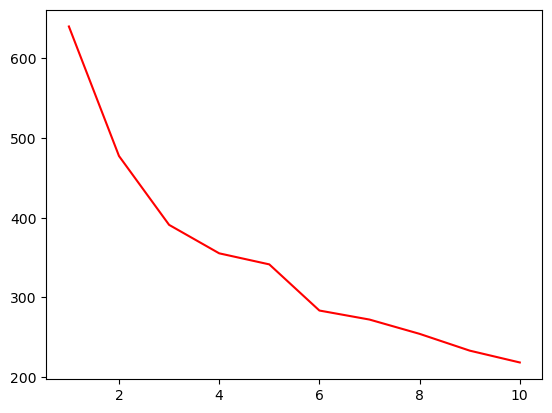

In [30]:
plt.plot(range(1,11),wcss,color="red")

In [33]:
#find the number of the cluste
wcss =[]
for i in range(1,11):
    Km = KMeans(n_clusters=i)
    Km.fit_predict(x_train)
    wcss.append(Km.inertia_)

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:14

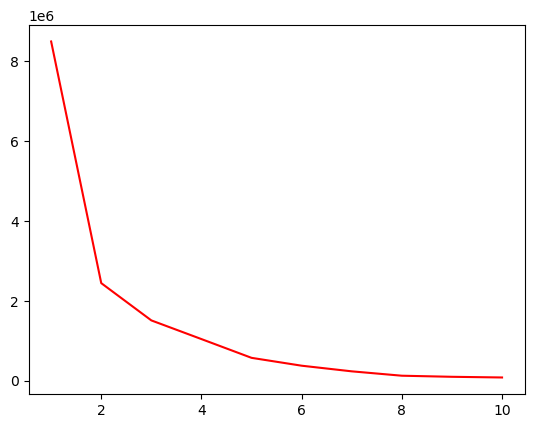

In [34]:
plt.plot(range(1,11),wcss,color="red")